In [1]:
# Surya Ferary Nainggolan
# 19 Oktober 2020
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-19 10:35:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.61MB/s    in 47s     

2020-10-19 10:36:03 (6.59 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'scissors', 'paper', 'README_rpc-cv-images.txt', 'rock']

In [5]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [6]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [7]:
from sklearn.model_selection import train_test_split
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [8]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [9]:
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [10]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [13]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 43s - loss: 1.0692 - accuracy: 0.4363 - val_loss: 0.7459 - val_accuracy: 0.7563
Epoch 2/20
25/25 - 43s - loss: 0.6015 - accuracy: 0.7563 - val_loss: 0.2387 - val_accuracy: 0.9375
Epoch 3/20
25/25 - 43s - loss: 0.2919 - accuracy: 0.8888 - val_loss: 0.4015 - val_accuracy: 0.8438
Epoch 4/20
25/25 - 47s - loss: 0.2872 - accuracy: 0.9075 - val_loss: 0.2349 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 43s - loss: 0.2160 - accuracy: 0.9337 - val_loss: 0.1630 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 43s - loss: 0.1785 - accuracy: 0.9450 - val_loss: 0.2158 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 43s - loss: 0.1638 - accuracy: 0.9488 - val_loss: 0.1322 - val_accuracy: 0.9812
Epoch 8/20
25/25 - 43s - loss: 0.1548 - accuracy: 0.9538 - val_loss: 0.0831 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 43s - loss: 0.1470 - accuracy: 0.9563 - val_loss: 0.0988 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 43s - loss: 0.0999 - accuracy: 0.9675 - val_loss: 0.2066 - val_accuracy: 0.9312
Epoch 11/

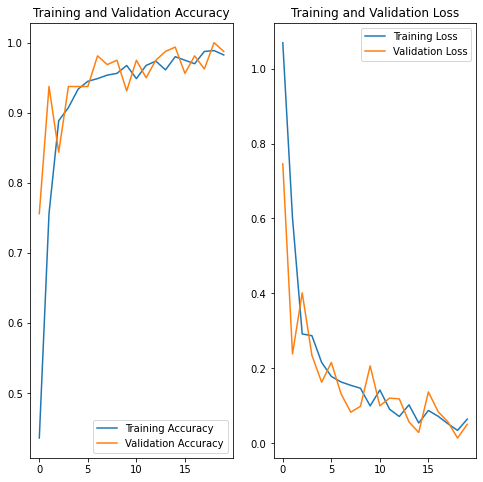

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png
Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
Saving 0cb6cVL8pkfi4wF6.png to 0cb6cVL8pkfi4wF6.png
Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
Saving 0eqArS2GgsBeqgSn.png to 0eqArS2GgsBeqgSn.png
Saving 0Flw60Z2MAWWKn6S.png to 0Flw60Z2MAWWKn6S.png
Saving 0NDYNEoDui7o64gU.png to 0NDYNEoDui7o64gU.png
Saving 0OEXfEooCXlljaEl.png to 0OEXfEooCXlljaEl.png
Saving 0Og76sl5CJhbxWWx.png to 0Og76sl5CJhbxWWx.png
Saving 0P6uxM8Vr1DwySHe.png to 0P6uxM8Vr1DwySHe.png
Saving 0RA9rcrv8iVvuDDU.png to 0RA9rcrv8iVvuDDU.png
Saving 0t08v9bAaA0mXGCQ.png to 0t08v9bAaA0mXGCQ.png
Saving 0Ug54ifXRqqlZS2Z.png to 0Ug54ifXRqqlZS2Z.png
Saving 0Uomd0HvOB33m47I.png to 0Uomd0HvOB33m47I.png
Saving 0vugygEjxQJPr9yz.png to 0vugygEjxQJPr9yz.png
Saving 0zKU6wEhT2cDe9j0.png to 0zKU6wEhT2cDe9j0.png
Saving 0zoQAmDFXehOZsAp.png to 0zoQAmDFXehOZsAp.png
Saving 01dM3

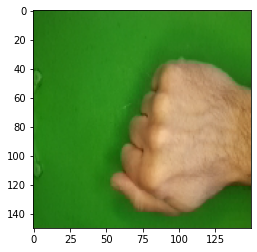

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')